# Light Data Exploratory Analysis

In [60]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
plt.style.use('ggplot')


#data from https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers
bank_data = pd.read_csv('churn.csv')

In [41]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
# These are the columns with missing values within the data set
col_with_missing = [col for col in bank_data.columns if bank_data[col].isnull().any()]
print(col_with_missing)

[]


In [43]:
bank_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [44]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [45]:
bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [46]:
bank_data = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [47]:
bank_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
# checking for duplicated rows
bank_data.loc[bank_data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [49]:
bank_data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Text(0.5, 0, 'Credit Score')

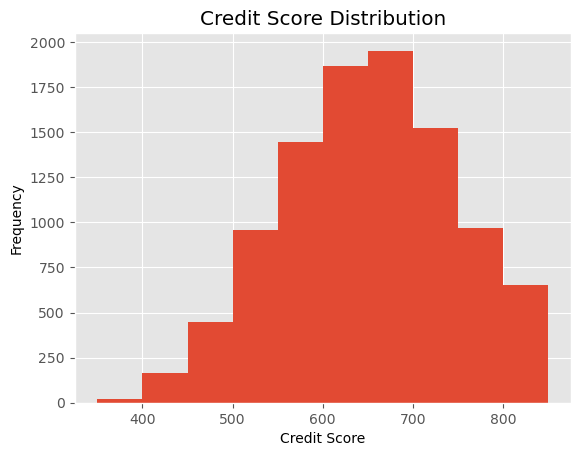

In [50]:
csd = bank_data['CreditScore'].plot(kind = 'hist', 
                              title = 'Credit Score Distribution')
csd.set_xlabel('Credit Score')

Text(0.5, 0, 'Credit Score')

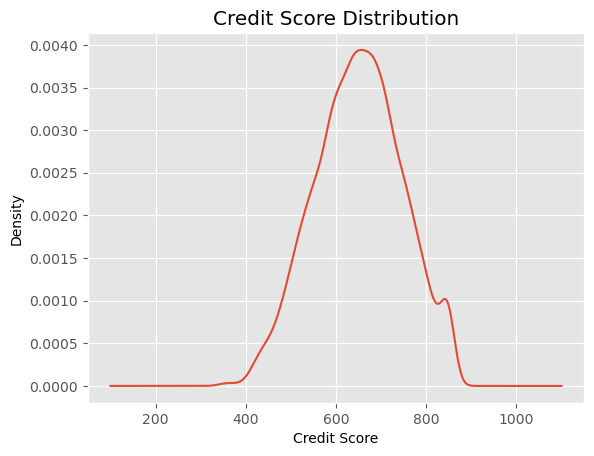

In [51]:
csd = bank_data['CreditScore'].plot(kind = 'kde', 
                              title = 'Credit Score Distribution')
csd.set_xlabel('Credit Score')

<Axes: >

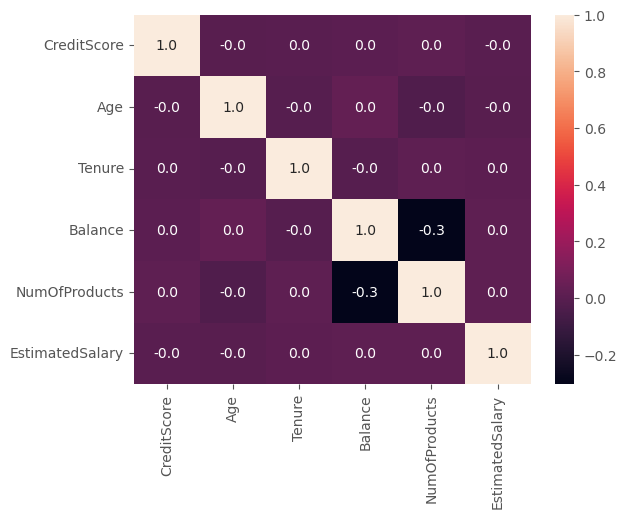

In [52]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
sns.heatmap(bank_data[numeric].corr(),
            annot = True, fmt=".1f")

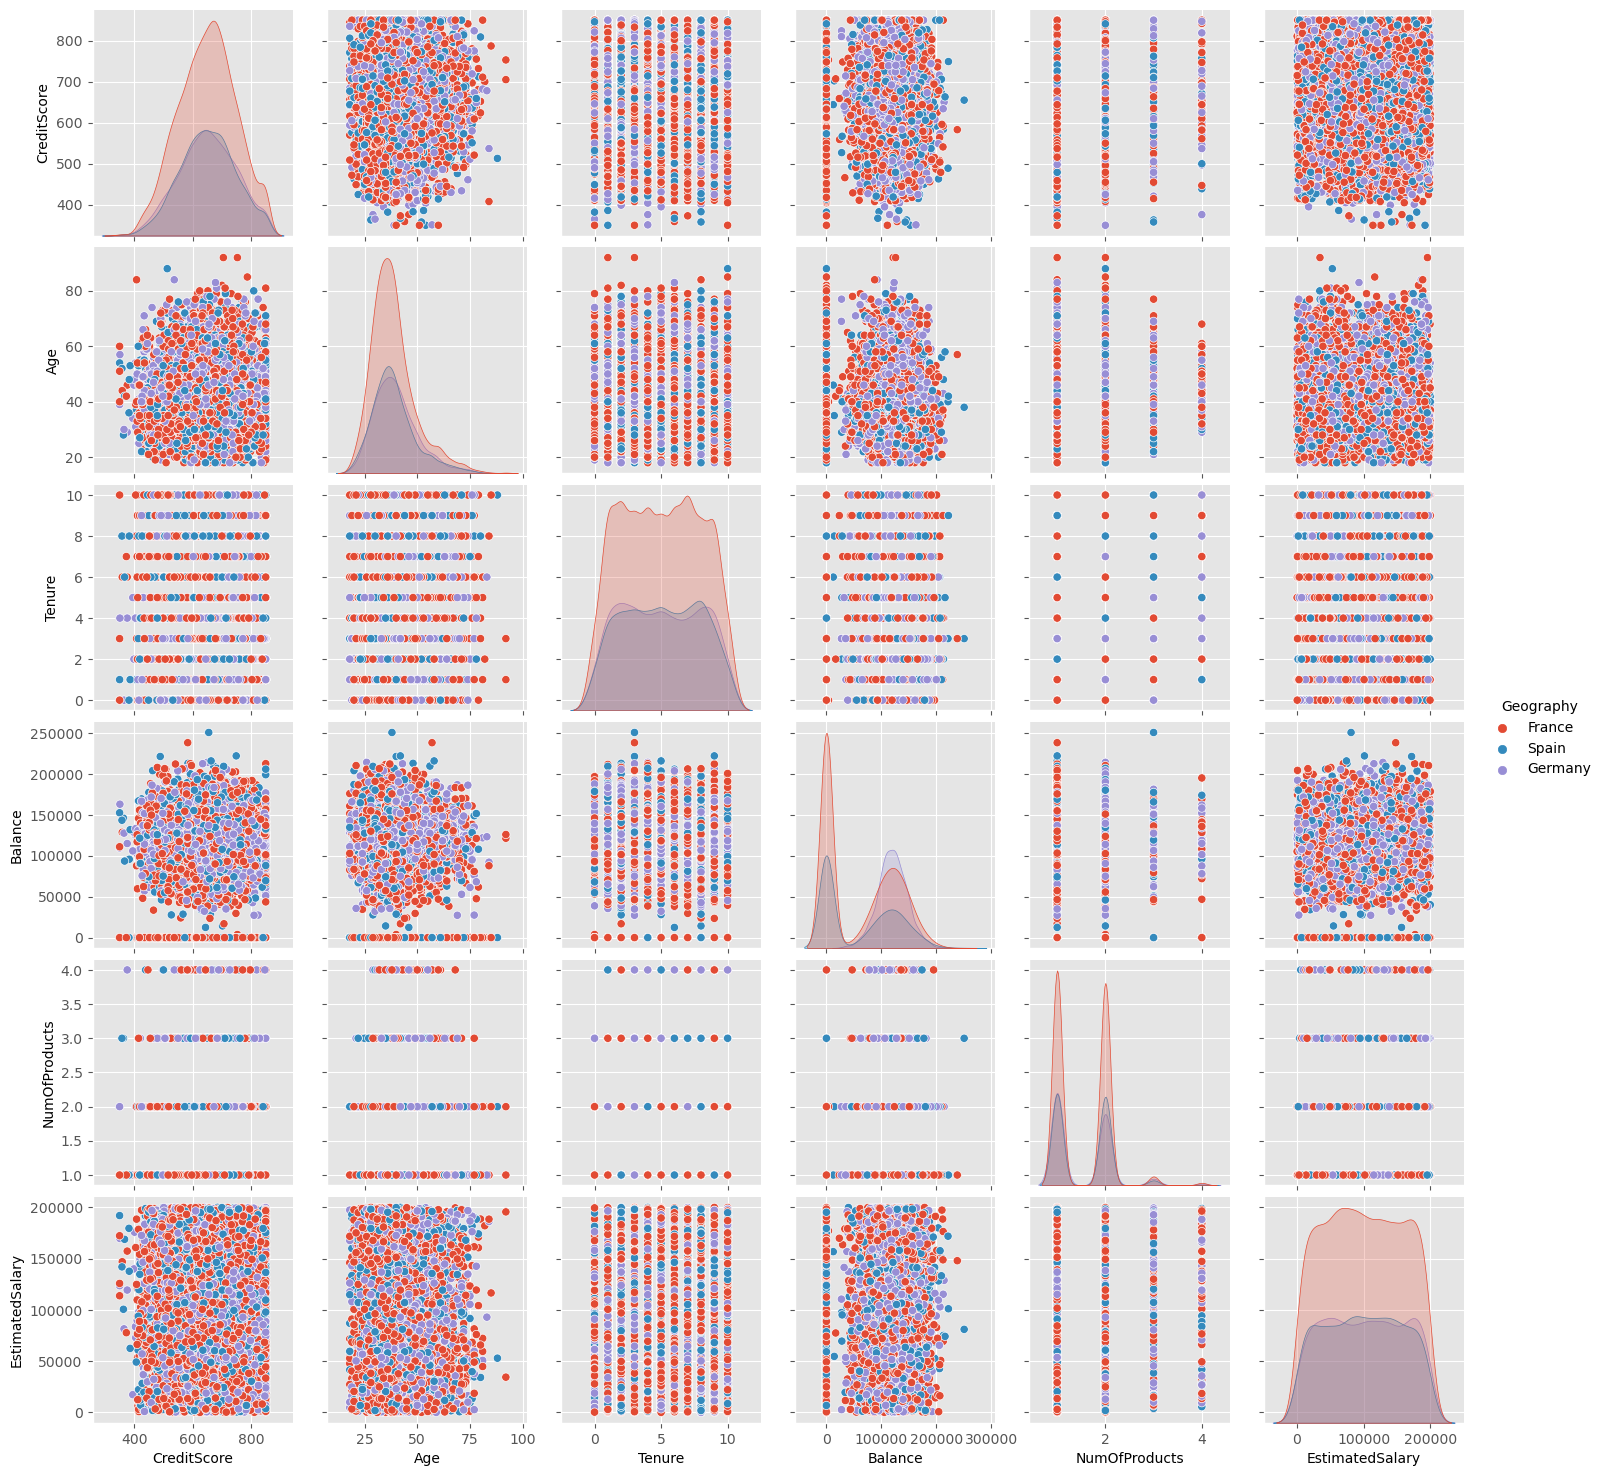

In [39]:
sns.pairplot(bank_data, vars = numeric, hue = 'Geography')

In [53]:
bank_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Model Construction

In [134]:
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [135]:
X = pd.get_dummies(bank_data[features])
y = bank_data['Exited']

In [136]:
from sklearn.model_selection import train_test_split
# Split data into training and validation data , for both features and target
# The split is based on a random number generator. Supplying  numeric value to
# the random_state argument guarantees we get the same split every single time we
# run this script
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.1)

#y is synonymous with the targets

#Define Model
churn_model = DecisionTreeRegressor()

#fit model
churn_model.fit(train_X, train_y)

#Get predictions
val_predictions = churn_model.predict(val_X)

In [137]:
#Cross validation
score = cross_val_score(churn_model, X, y, cv=5, scoring='accuracy')
print('Accuracy%:\n', score)

Accuracy%:
 [0.794  0.7945 0.794  0.804  0.7885]


In [138]:
print('Average Accuracy score (across experimennts):')
print(score.mean())

Average Accuracy score (across experimennts):
0.7950000000000002


# Basic Model has an Accuracy of 80%

# Hyperparameter tuning

In [139]:
x = pd.Series(val_y).array

In [140]:
type(val_predictions)

numpy.ndarray

In [147]:
def calculate_accuracy(array1, array2):
    if len(array1) != len(array2):
        raise ValueError("Both arrays must have the same length.")

    correct_count = 0
    total_count = len(array1)

    for i in range(total_count):
        if array1[i] == array2[i]:
            correct_count += 1

    accuracy = correct_count / total_count * 100
    return accuracy

In [148]:
calculate_accuracy(val_predictions, x)

15.6

## Max Tree Depth

[0.0, 0.0, 0.0, 0.1, 2.3, 3.0, 4.2, 12.1, 15.6, 19.400000000000002, 28.000000000000004, 37.0, 50.5, 58.3, 63.1, 67.30000000000001, 72.8, 75.1, 77.5, 78.8, 79.3, 80.10000000000001, 80.2, 80.10000000000001, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9, 79.9]


/var/folders/xx/mjmnx9zx0bjfztfkzwrdc_lc0000gn/T/ipykernel_23716/3559515932.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(errIndex, err, 'rs-', color = 'orange', linewidth = 1.5)


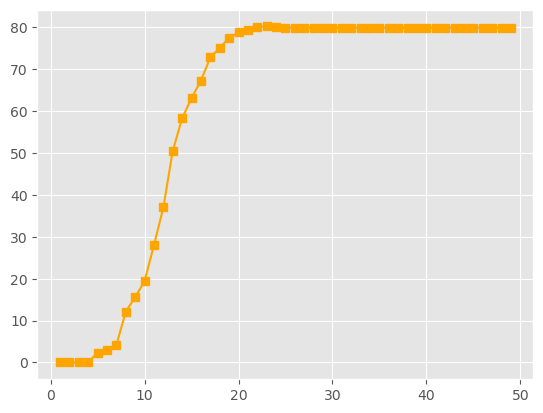

In [153]:

err = []
errIndex = []
for treedepth in range(1,50):
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.1)
    churn_model = DecisionTreeRegressor(random_state = 2345, max_depth = treedepth)
    churn_model.fit(train_X, train_y)
    val_predictions = churn_model.predict(val_X)
    x = pd.Series(val_y).array
    accuracy = calculate_accuracy(val_predictions, x)
    err.append(accuracy)
    errIndex.append(treedepth)
    
print(err)
plt.plot(errIndex, err, 'rs-', color = 'orange', linewidth = 1.5)

    
    
    

# # Max Leaf Count

[79.9, 76.3, 69.3, 66.2, 64.0, 61.9, 59.4, 56.599999999999994, 53.0, 50.4, 48.1, 47.5, 45.6, 43.7, 41.699999999999996, 41.4, 40.400000000000006, 39.1, 38.800000000000004, 37.6, 36.9, 35.5, 34.300000000000004, 34.0, 32.7, 32.9, 32.7, 31.6, 32.0, 30.099999999999998, 30.0, 28.299999999999997, 29.4, 28.499999999999996, 28.199999999999996, 27.500000000000004, 27.6, 26.0, 26.3, 25.7, 25.2, 23.7, 23.400000000000002, 23.200000000000003, 21.7, 21.4, 21.5, 21.099999999999998, 21.3]


/var/folders/xx/mjmnx9zx0bjfztfkzwrdc_lc0000gn/T/ipykernel_23716/707395192.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(errIndex, err, 'rs-', color = 'orange', linewidth = 1.5)


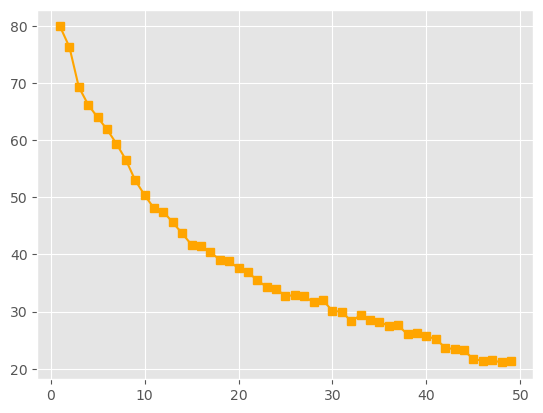

In [156]:

err = []
errIndex = []
for leafcount in range(1,50):
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.1)
    churn_model = DecisionTreeRegressor(random_state = 2345, min_samples_leaf = leafcount)
    churn_model.fit(train_X, train_y)
    val_predictions = churn_model.predict(val_X)
    x = pd.Series(val_y).array
    accuracy = calculate_accuracy(val_predictions, x)
    err.append(accuracy)
    errIndex.append(leafcount)
    
print(err)
plt.plot(errIndex, err, 'rs-', color = 'orange', linewidth = 1.5)

    